# Imports

In [4]:
import os
import sys

sys.path.append("../src")
FIGS_PATH = "../figs"

import random
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import text_flappy_bird_gym
from IPython.display import clear_output
from tqdm import tqdm

from agents import BaseAgent, MonteCarloAgent
from plotting import plot_policy, plot_state_values

np.random.seed(42)
random.seed(42)

# Monte-Carlo Agent

In [5]:
env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)

mc_agent = MonteCarloAgent(
    env,
    alpha=0.02,
    gamma=0.9,
    epsilon=1.0,
    epsilon_decay=0.9999,
    epsilon_min=0.1,
)
epsilons, episode_rewards, episode_lengths = mc_agent.train(20_000, max_reward=5_000)

100%|██████████| 20000/20000 [01:27<00:00, 229.65it/s]


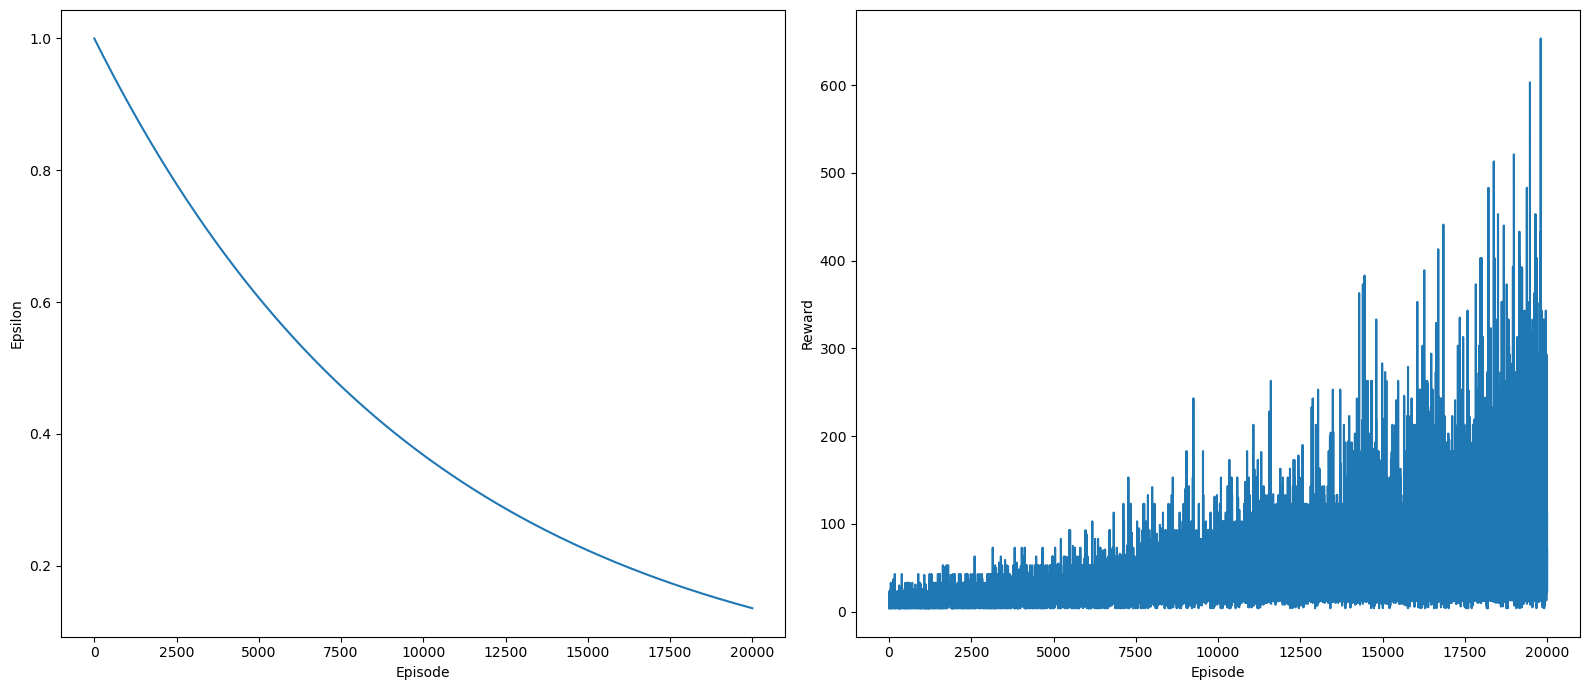

In [6]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.plot(epsilons)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.subplot(122)
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.tight_layout()
# plt.savefig(os.path.join(FIGS_PATH, "mc-train.png"))
plt.show()

100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


[]

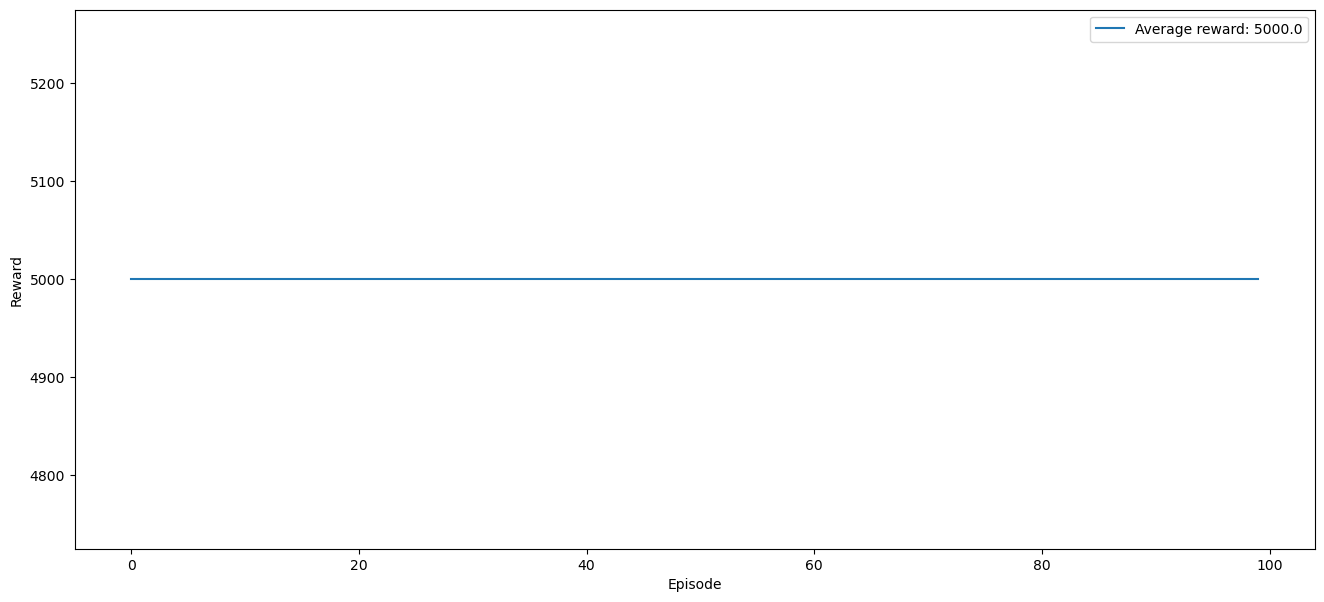

In [7]:
rewards = mc_agent.test(100, max_reward=5_000)

plt.figure(figsize=(16, 7))
plt.plot(rewards, label=f"Average reward: {np.mean(rewards)}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
# plt.savefig(os.path.join(FIGS_PATH, "mc-test.png"))
plt.plot()

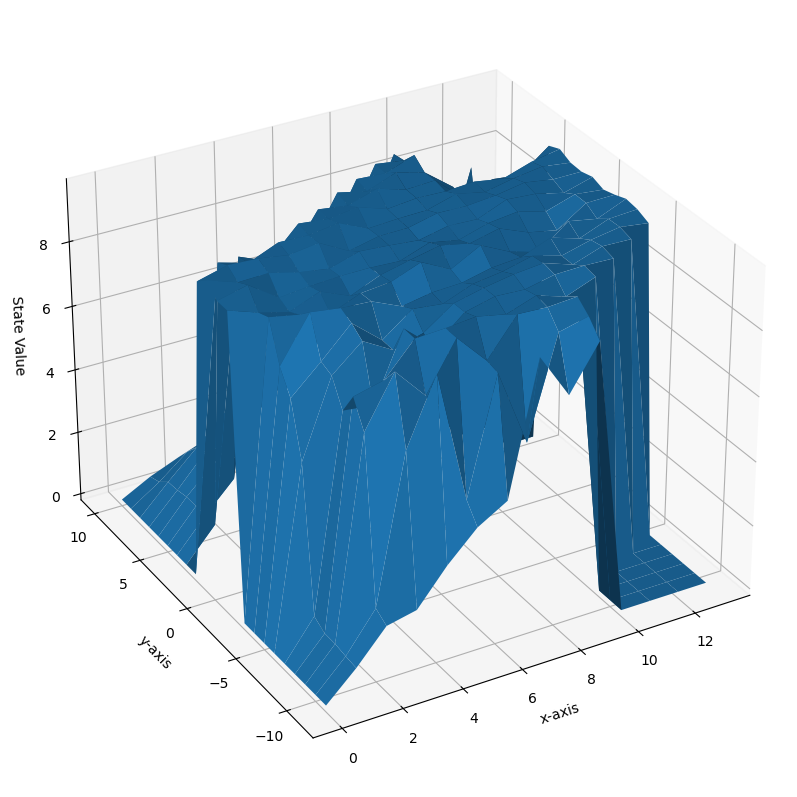

In [8]:
plot_state_values(
    mc_agent.Q,
    title="",
    # save_file=os.path.join(FIGS_PATH, "mc-state-values.png"),
)

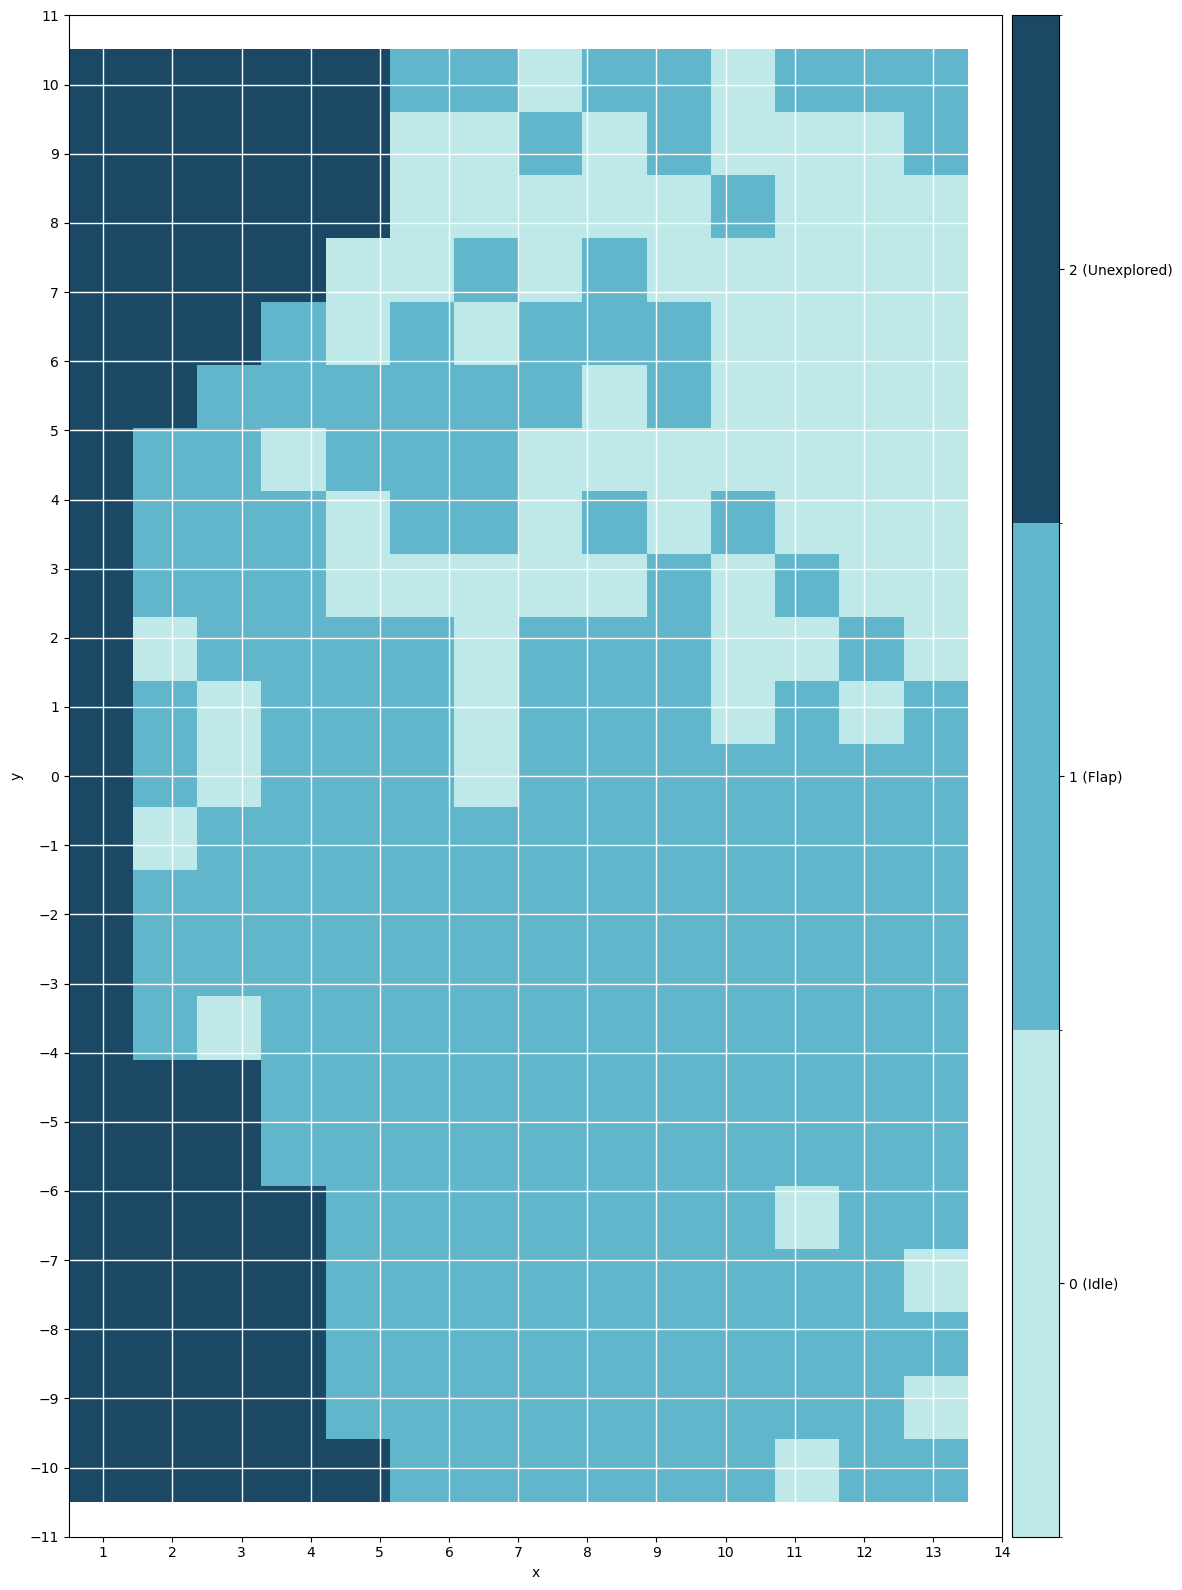

In [9]:
plot_policy(
    mc_agent.Q,
    title="",
    # save_file=os.path.join(FIGS_PATH, "mc-policy.png"),
)